In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cares = pd.read_csv("../data/CARES_encoded.csv")
cares

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,0.0,0,1,0,0
1,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,0.0,0.0,0,1,0,0
2,0,NaN,1.0,152.538570,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
3,1,NaN,2.0,117.231496,NaN,0.0,1.0,0.0,1.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
4,1,0.0,1.0,98.651255,59.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,0,2.0,1.0,48.339582,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,2.0,0.0,1.0,0,0,0,0
90781,1,1.0,2.0,126.592489,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,0.0,0.0,NaN,0,0,0,0
90782,0,NaN,0.0,86.306771,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,1.0,0.0,NaN,0,0,0,0
90783,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,1.0,0,1,0,0


Following what the papers say as "statistically significant"

In [3]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [4]:
# to predict mortality, these columns are considered important
mortality_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'GradeofKidneyCategory',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'GENDER'
]

mortality_cares = cares[mortality_significant_columns + ['Mortality']]

In [5]:
mortality_cares = mortality_cares.dropna(how='any')

In [6]:
mortality_cares.shape

(76064, 15)

In [7]:
mortality_cares["Mortality"].isna().value_counts()

Mortality
False    76064
Name: count, dtype: int64

In [8]:
mortality_cares["Mortality"].value_counts()

Mortality
0    71083
1     4981
Name: count, dtype: int64

In [9]:
icu_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'GradeofKidneyCategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'PriorityCategory',
    'GENDER'
]
# same as mortality, but with surgical priority column (Priority Category)

icu_cares = cares[icu_significant_columns + ["ICUAdmgt24h"]]

In [10]:
icu_cares = icu_cares.dropna(how='any')

In [11]:
icu_cares["ICUAdmgt24h"].value_counts()

ICUAdmgt24h
0    75008
1     1056
Name: count, dtype: int64

In [12]:
icu_cares.shape

(76064, 16)

Save as CSV

In [13]:
mortality_cares.to_csv("../data/CARES_mortality_dropna.csv", index=False)
icu_cares.to_csv("../data/CARES_ICU_dropna.csv", index=False)

# Simple Modeling

## Mortality

In [14]:
RANDOM_SEED = 6402

In [15]:
np.random.seed(RANDOM_SEED)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = mortality_cares.drop('Mortality', axis=1)
y = mortality_cares['Mortality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

Oversampling

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE()

x_res, y_res = smote.fit_resample(x_train, y_train)

In [20]:
model_evaluations = {}

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [22]:
naive_mort = GaussianNB()
logreg_mort = LogisticRegression(random_state=RANDOM_SEED)
rf_mort = RandomForestClassifier(random_state=RANDOM_SEED)

# apply the same for smote data
naive_mort_smote = GaussianNB()
logreg_mort_smote = LogisticRegression(random_state=RANDOM_SEED)
rf_mort_smote = RandomForestClassifier(random_state=RANDOM_SEED)

#### Naive Bayes

In [23]:
naive_mort.fit(x_train, y_train)

GaussianNB()

In [26]:
y_pred = naive_mort.predict(x_test)
y_pred_proba = naive_mort.predict_proba(x_test)

In [27]:
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, precision_recall_curve, confusion_matrix

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     21326
           1       0.24      0.45      0.32      1494

    accuracy                           0.87     22820
   macro avg       0.60      0.68      0.62     22820
weighted avg       0.91      0.87      0.89     22820



In [29]:
f1_score(y_test, y_pred)

0.3154916293327045

In [30]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.8257860602433492

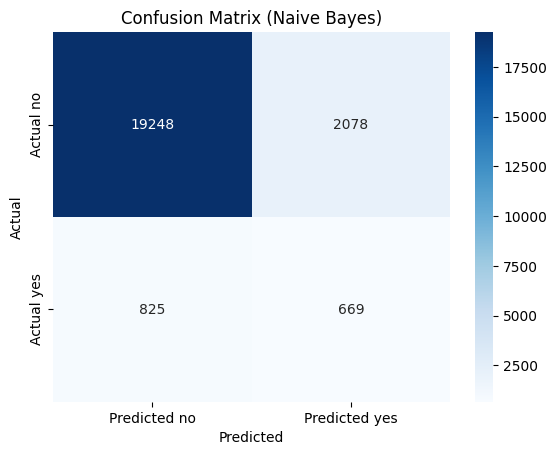

In [34]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

In [32]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
normalized_conf_mat

,Predicted no,Predicted yes
Actual no,0.9589,0.756462
Actual yes,0.0411,0.243538


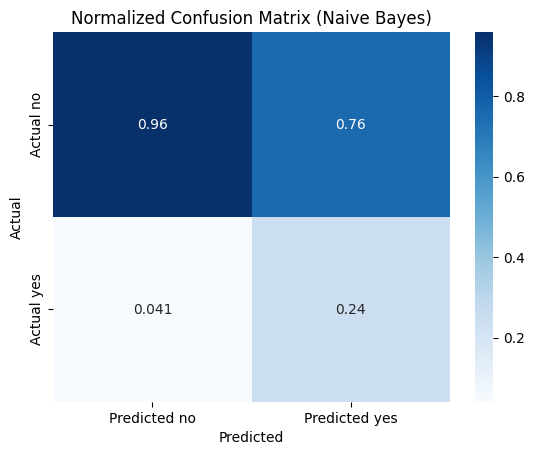

In [33]:
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Naive Bayes)')
plt.show()

In [35]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [36]:
model_evaluations["Naive Bayes"] = (fpr, tpr, prec, rec)

#### Naive Bayes SMOTE

In [24]:
naive_mort_smote.fit(x_res, y_res)

GaussianNB()

In [37]:
y_pred = naive_mort_smote.predict(x_test)
y_pred_proba = naive_mort_smote.predict_proba(x_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     21326
           1       0.20      0.66      0.31      1494

    accuracy                           0.81     22820
   macro avg       0.59      0.74      0.60     22820
weighted avg       0.92      0.81      0.85     22820



In [39]:
f1_score(y_test, y_pred)

0.3089226909204955

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.8246131545469758

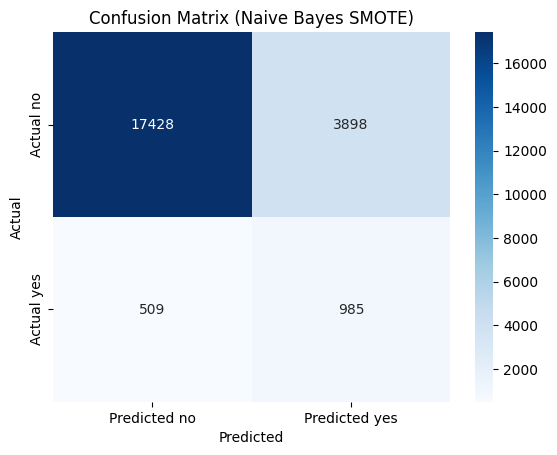

In [41]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes SMOTE)')
plt.show()

In [42]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
normalized_conf_mat

,Predicted no,Predicted yes
Actual no,0.971623,0.79828
Actual yes,0.028377,0.20172


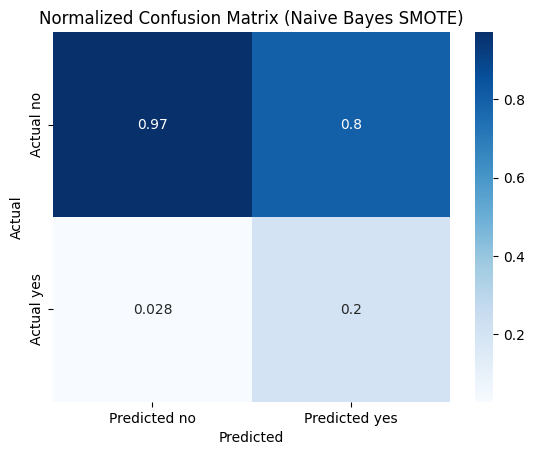

In [43]:
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Naive Bayes SMOTE)')
plt.show()

In [44]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [45]:
model_evaluations["Naive Bayes SMOTE"] = (fpr, tpr, prec, rec)

#### Logistic Regression

In [46]:
logreg_mort.fit(x_train, y_train)
logreg_mort_smote.fit(x_res, y_res)

LogisticRegression(random_state=6402)

In [47]:
rf_mort.fit(x_train, y_train)
rf_mort_smote.fit(x_res, y_res)

RandomForestClassifier(random_state=6402)

In [48]:
y_pred = logreg_mort.predict(x_test)
y_pred_proba = logreg_mort.predict_proba(x_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     21326
           1       0.51      0.12      0.19      1494

    accuracy                           0.93     22820
   macro avg       0.73      0.55      0.58     22820
weighted avg       0.91      0.93      0.92     22820



In [50]:
f1_score(y_test, y_pred)

0.18907103825136612

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [52]:
auc(fpr, tpr)

0.8542348141510994

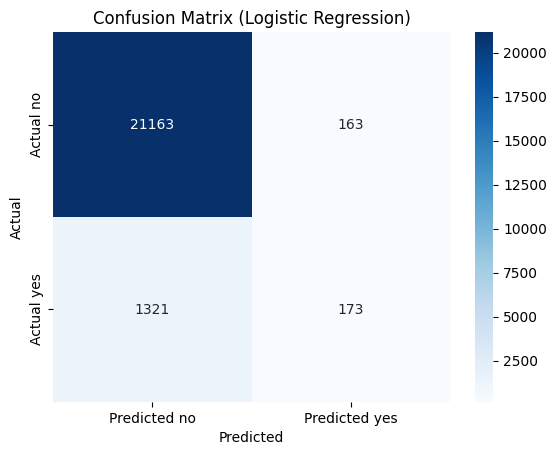

In [53]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [54]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
normalized_conf_mat

,Predicted no,Predicted yes
Actual no,0.941247,0.485119
Actual yes,0.058753,0.514881


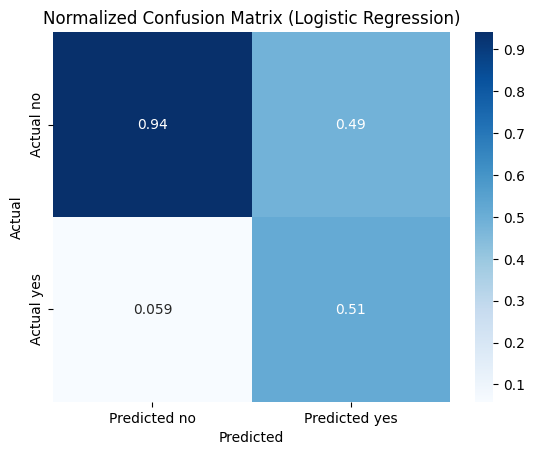

In [55]:
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression)')
plt.show()

In [56]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [57]:
model_evaluations["Logistic Regression"] = (fpr, tpr, prec, rec)

#### Logistic Regression SMOTE

In [58]:
y_pred = logreg_mort_smote.predict(x_test)
y_pred_proba = logreg_mort_smote.predict_proba(x_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     21326
           1       0.21      0.75      0.33      1494

    accuracy                           0.80     22820
   macro avg       0.59      0.78      0.60     22820
weighted avg       0.93      0.80      0.84     22820



In [60]:
f1_score(y_test, y_pred)

0.32727272727272727

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [62]:
auc(fpr, tpr)

0.847934455631774

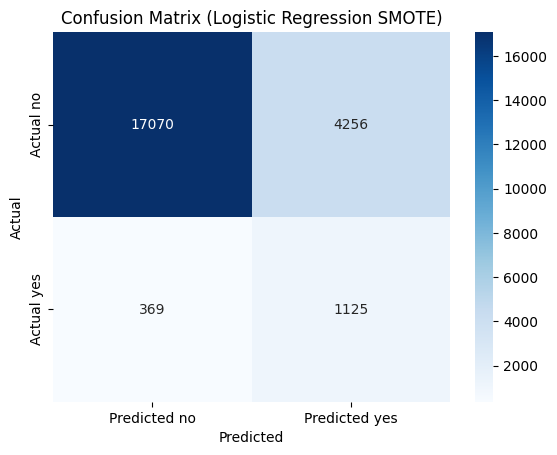

In [63]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

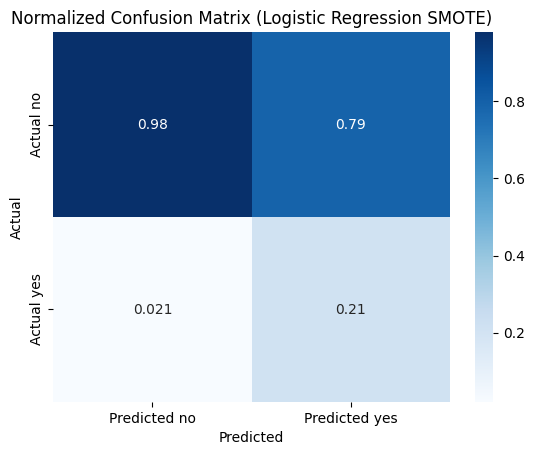

In [64]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

In [65]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [66]:
model_evaluations["Logistic Regression SMOTE"] = (fpr, tpr, prec, rec)

#### Random Forest

In [67]:
y_pred = rf_mort.predict(x_test)
y_pred_proba = rf_mort.predict_proba(x_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     21326
           1       0.41      0.16      0.23      1494

    accuracy                           0.93     22820
   macro avg       0.68      0.57      0.60     22820
weighted avg       0.91      0.93      0.92     22820



In [69]:
f1_score(y_test, y_pred)

0.22707423580786026

In [70]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.80527397344544

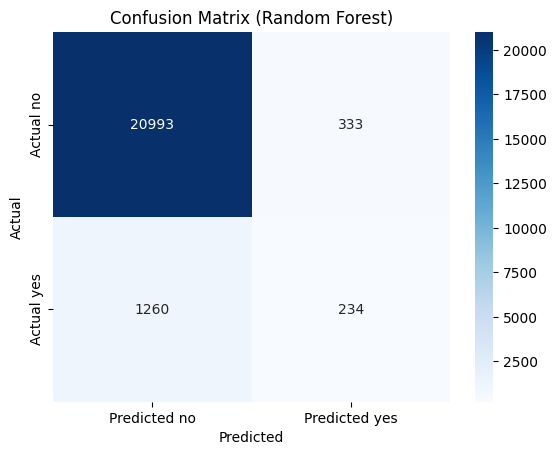

In [71]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

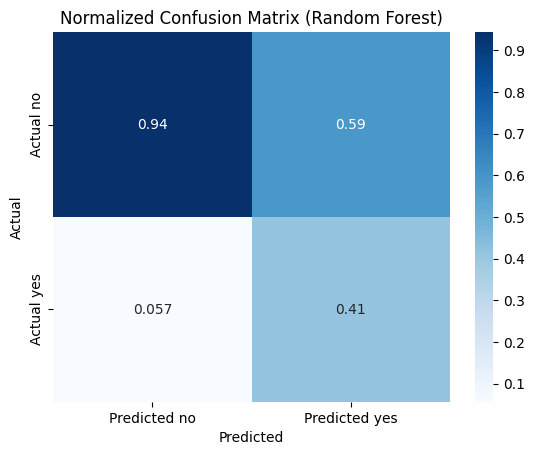

In [72]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest)')
plt.show()

In [73]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [74]:
model_evaluations["Random Forest"] = (fpr, tpr, prec, rec)

#### Random Forest SMOTE

In [75]:
y_pred = rf_mort_smote.predict(x_test)
y_pred_proba = rf_mort_smote.predict_proba(x_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     21326
           1       0.21      0.51      0.30      1494

    accuracy                           0.84     22820
   macro avg       0.59      0.69      0.60     22820
weighted avg       0.91      0.84      0.87     22820



In [77]:
f1_score(y_test, y_pred)

0.298114689709348

In [78]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.7484946664020175

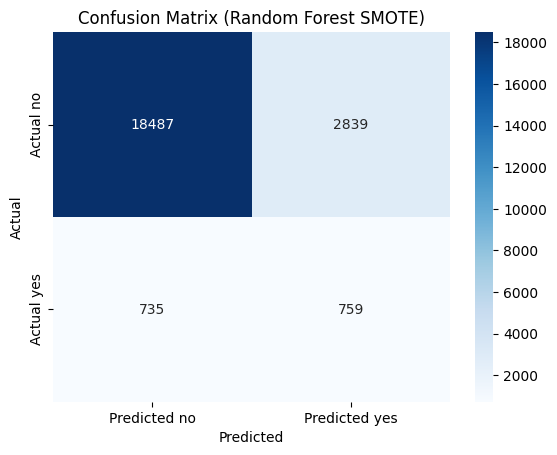

In [79]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest SMOTE)')
plt.show()

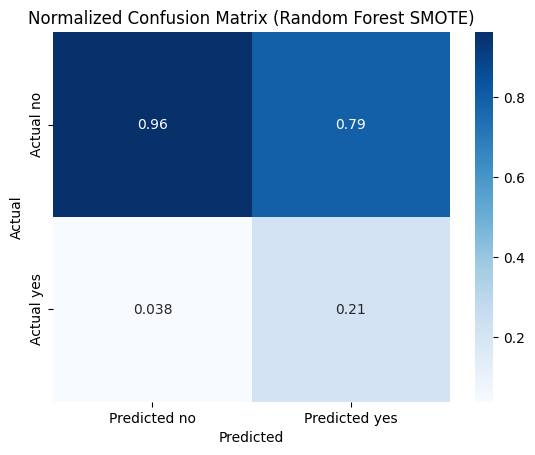

In [80]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest SMOTE)')
plt.show()

In [81]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [82]:
model_evaluations["Random Forest SMOTE"] = (fpr, tpr, prec, rec)

In [83]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

#### Neural Net

In [84]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [85]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [86]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [87]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - auc: 0.6440 - f1_score: 0.1251 - loss: 0.2777 - val_auc: 0.8428 - val_f1_score: 0.1229 - val_loss: 0.1878
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8406 - f1_score: 0.1185 - loss: 0.1840 - val_auc: 0.8493 - val_f1_score: 0.1229 - val_loss: 0.1854
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - auc: 0.8446 - f1_score: 0.1217 - loss: 0.1860 - val_auc: 0.8557 - val_f1_score: 0.1229 - val_loss: 0.1831
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - auc: 0.8488 - f1_score: 0.1191 - loss: 0.1812 - val_auc: 0.8552 - val_f1_score: 0.1229 - val_loss: 0.1848
Epoch 5/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - auc: 0.8558 - f1_score: 0.1223 - loss: 0.1823 - val_auc: 0.8545 - val_f1_score: 0.1229 - val_loss: 0.1834
Epoch 6/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - auc: 0.8564 - f1_score: 0.1238 - loss: 0.1826 - val_auc: 0.8581 - val_f1_score: 0.1229 - val_loss: 0.1825
Epoch 7/10
1664/

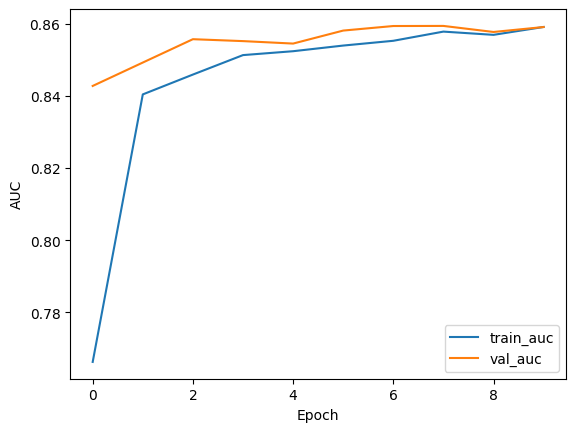

In [89]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [90]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [91]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [92]:
f1_score(y_test, y_pred)

0.0973505853357979

In [93]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8604618386013967

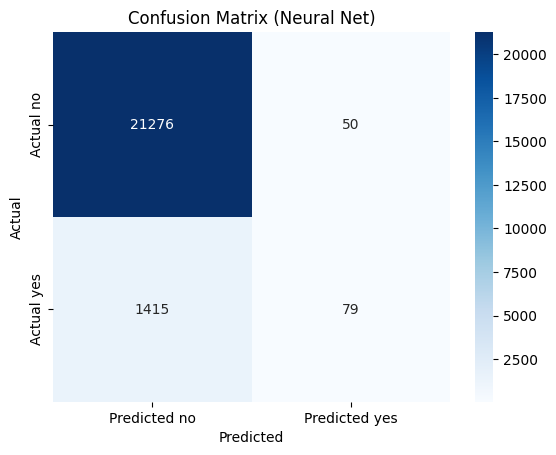

In [94]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

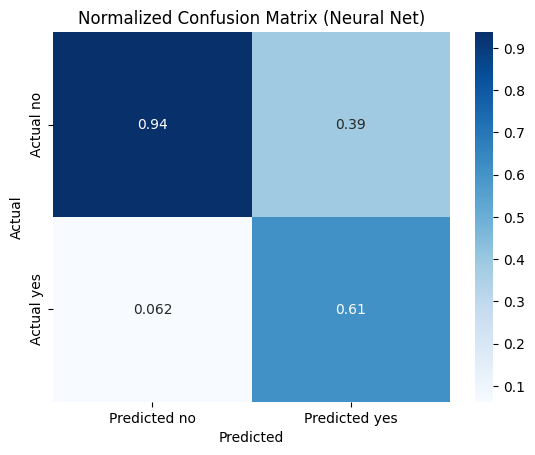

In [95]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [96]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

In [97]:
model_evaluations["Neural Net"] = (fpr, tpr, prec, rec)

#### Neural Net SMOTE

In [98]:
model_smote = Sequential()
model_smote.add(Input((X.shape[1],)))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(1, activation='sigmoid'))

In [99]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [100]:
model_smote.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
history = model_smote.fit(x_res, y_res, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 120s 38ms/step - auc: 0.8127 - f1_score: 0.6683 - loss: 0.5261 - val_auc: 0.8491 - val_f1_score: 0.1229 - val_loss: 0.4681
Epoch 2/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 106s 34ms/step - auc: 0.8588 - f1_score: 0.6677 - loss: 0.4688 - val_auc: 0.8511 - val_f1_score: 0.1229 - val_loss: 0.4557
Epoch 3/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - auc: 0.8637 - f1_score: 0.6633 - loss: 0.4615 - val_auc: 0.8509 - val_f1_score: 0.1229 - val_loss: 0.4047
Epoch 4/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - auc: 0.8673 - f1_score: 0.6659 - loss: 0.4552 - val_auc: 0.8495 - val_f1_score: 0.1229 - val_loss: 0.4621
Epoch 5/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - auc: 0.8690 - f1_score: 0.6663 - loss: 0.4526 - val_auc: 0.8439 - val_f1_score: 0.1229 - val_loss: 0.4646
Epoch 6/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - auc: 0.8715 - f1_score: 0.6663 - loss: 0.4484 - val_auc: 0.8478 - val_f1_score: 0.1229 - val_loss: 0.5024
Epoch 7/10
311

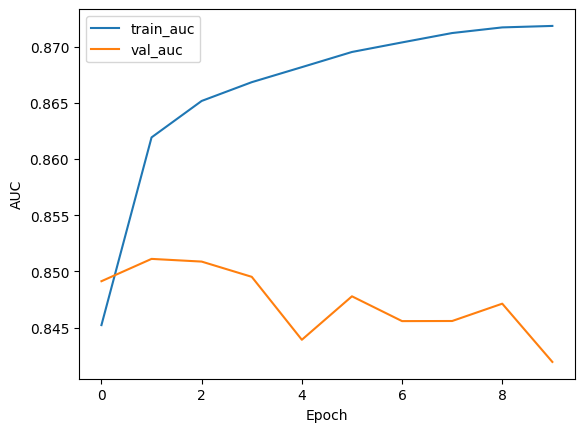

In [102]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [103]:
y_pred_proba = model_smote.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step


In [104]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [105]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8420394039818657

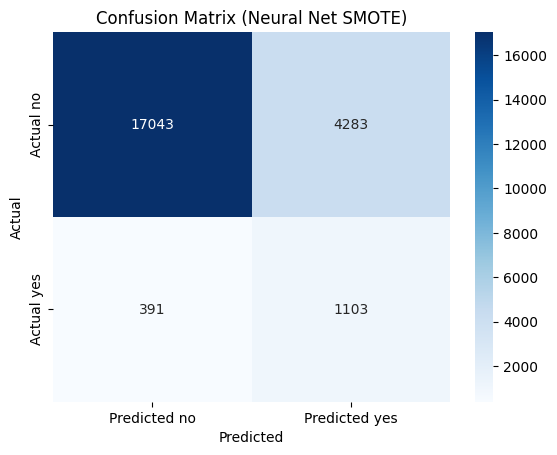

In [106]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

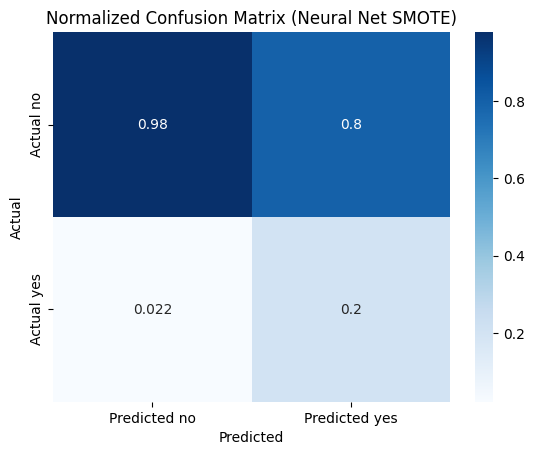

In [107]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [108]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

In [109]:
model_evaluations["Neural Net SMOTE"] = (fpr, tpr, prec, rec)

#### XGBoost

In [110]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     21326
           1       0.47      0.14      0.21      1494

    accuracy                           0.93     22820
   macro avg       0.71      0.56      0.59     22820
weighted avg       0.91      0.93      0.92     22820

0.21112844513780551


0.8548776053917129

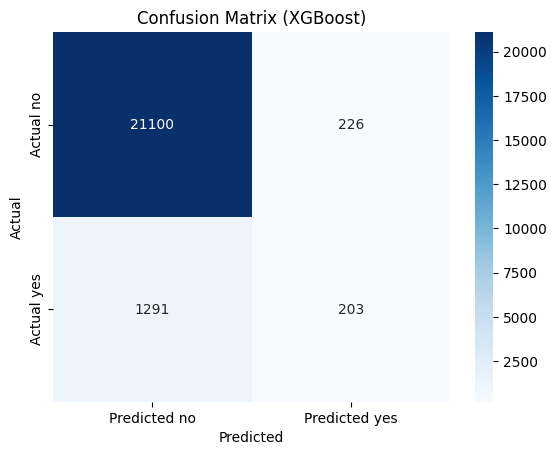

In [111]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

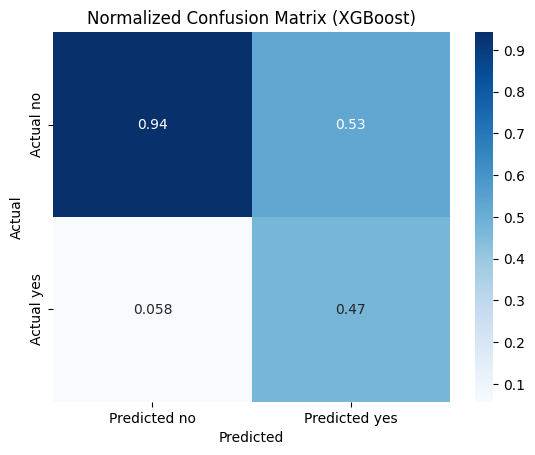

In [112]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost)')
plt.show()

In [113]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [114]:
model_evaluations["XGBoost"] = (fpr, tpr, prec, rec)

#### XGBoost SMOTE

In [115]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_res, y_res)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.97      0.85      0.90     21326
           1       0.22      0.63      0.33      1494

    accuracy                           0.83     22820
   macro avg       0.60      0.74      0.62     22820
weighted avg       0.92      0.83      0.87     22820

0.32824829037348763


0.8099669929208848

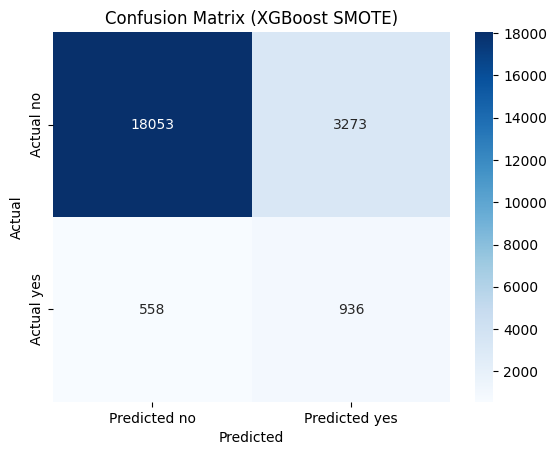

In [116]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost SMOTE)')
plt.show()

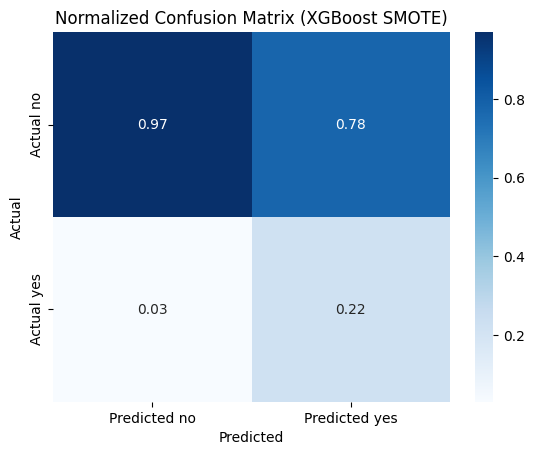

In [117]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost SMOTE)')
plt.show()

In [118]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [119]:
model_evaluations["XGBoost SMOTE"] = (fpr, tpr, prec, rec)

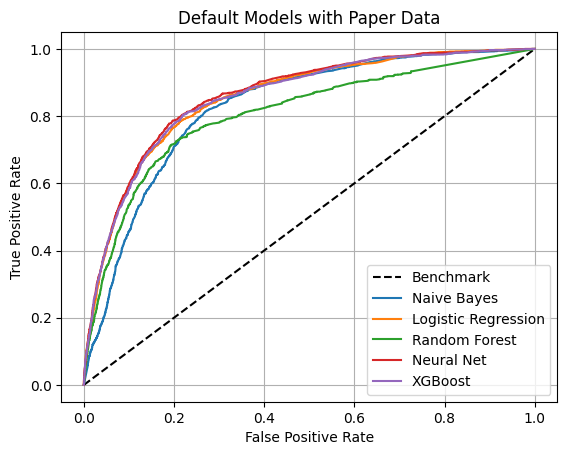

In [120]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    if "SMOTE" in model_name:
        continue
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

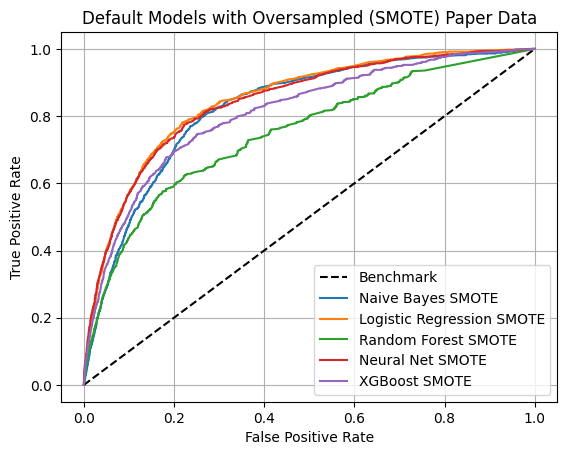

In [121]:
plt.title("Default Models with Oversampled (SMOTE) Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    if "SMOTE" not in model_name:
        continue
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

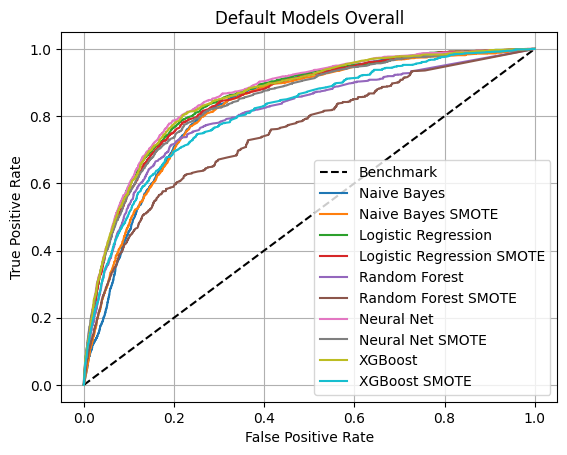

In [122]:
plt.title("Default Models Overall")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

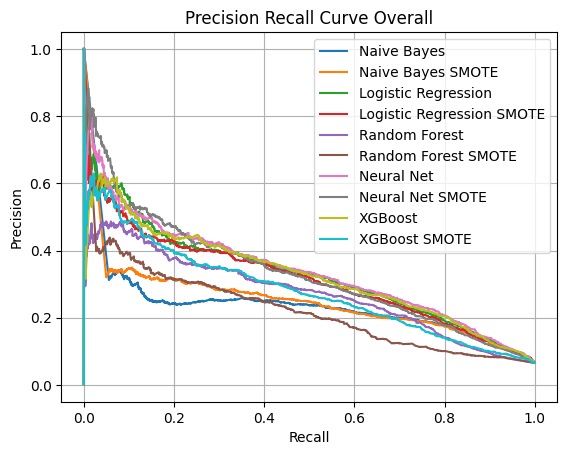

In [123]:
# precision recall curve
plt.title("Precision Recall Curve Overall")

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name][3], model_evaluations[model_name][2], label=model_name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()


## ICU

In [124]:
X = icu_cares.drop('ICUAdmgt24h', axis=1)
y = icu_cares['ICUAdmgt24h']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

In [125]:
x_res, y_res = smote.fit_resample(x_train, y_train)

In [126]:
model_evaluations = {}

In [127]:
x_res.shape

(105010, 15)

#### Naive Bayes

In [128]:
naive_icu = GaussianNB()

In [129]:
naive_icu.fit(x_train, y_train)

GaussianNB()

In [130]:
y_pred = naive_icu.predict(x_test)
y_pred_proba = naive_icu.predict_proba(x_test)

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     22503
           1       0.07      0.40      0.12       317

    accuracy                           0.92     22820
   macro avg       0.53      0.66      0.54     22820
weighted avg       0.98      0.92      0.94     22820



In [132]:
f1_score(y_test, y_pred)

0.11591536338546458

In [133]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.8449411792412957

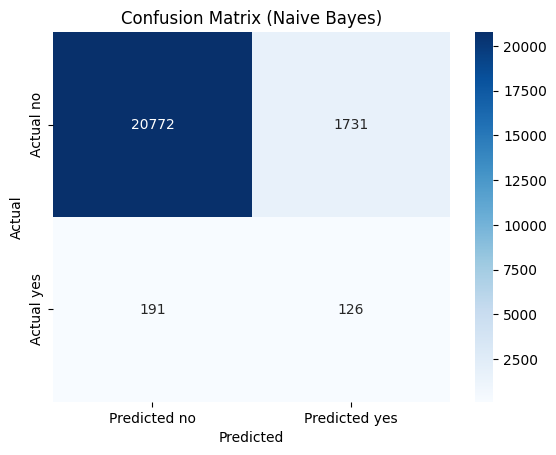

In [134]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

In [135]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
normalized_conf_mat

,Predicted no,Predicted yes
Actual no,0.990889,0.932149
Actual yes,0.009111,0.067851


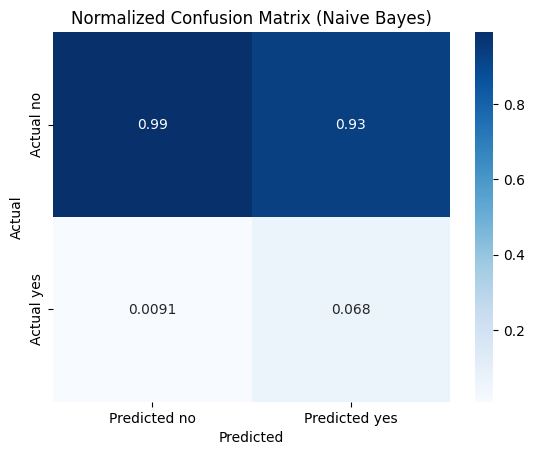

In [136]:
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Naive Bayes)')
plt.show()

In [137]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [138]:
model_evaluations["Naive Bayes"] = (fpr, tpr, prec, rec)

#### Naive Bayes SMOTE

In [139]:
naive_icu_smote = GaussianNB()

In [140]:
naive_icu_smote.fit(x_res, y_res)

GaussianNB()

In [141]:
y_pred = naive_icu_smote.predict(x_test)
y_pred_proba = naive_icu_smote.predict_proba(x_test)

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     22503
           1       0.05      0.76      0.09       317

    accuracy                           0.80     22820
   macro avg       0.52      0.78      0.49     22820
weighted avg       0.98      0.80      0.88     22820



In [143]:
f1_score(y_test, y_pred)

0.09488335620466576

In [144]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.8245014229438177

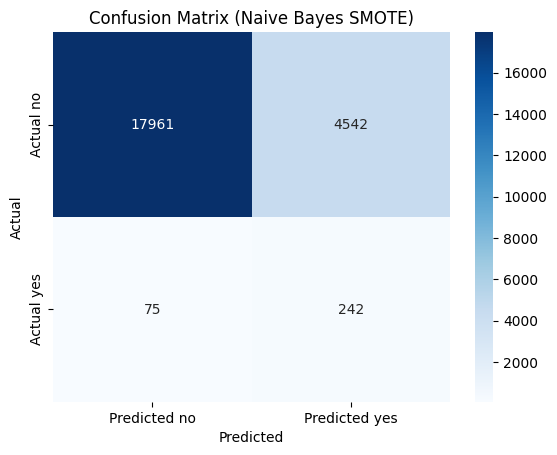

In [145]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes SMOTE)')
plt.show()

In [146]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
normalized_conf_mat

,Predicted no,Predicted yes
Actual no,0.995842,0.949415
Actual yes,0.004158,0.050585


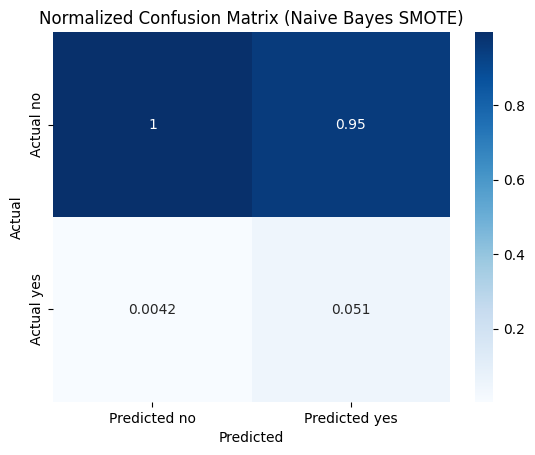

In [147]:
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Naive Bayes SMOTE)')
plt.show()

In [148]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [149]:
model_evaluations["Naive Bayes SMOTE"] = (fpr, tpr, prec, rec)

#### Logistic Regression

In [150]:
logreg_icu = LogisticRegression(random_state=RANDOM_SEED)

In [151]:
logreg_icu.fit(x_train, y_train)

LogisticRegression(random_state=6402)

In [152]:
y_pred = logreg_icu.predict(x_test)
y_pred_proba = logreg_icu.predict_proba(x_test)

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.29      0.03      0.05       317

    accuracy                           0.99     22820
   macro avg       0.64      0.51      0.52     22820
weighted avg       0.98      0.99      0.98     22820



In [154]:
f1_score(y_test, y_pred)

0.05172413793103448

In [155]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [156]:
auc(fpr, tpr)

0.8863386739461727

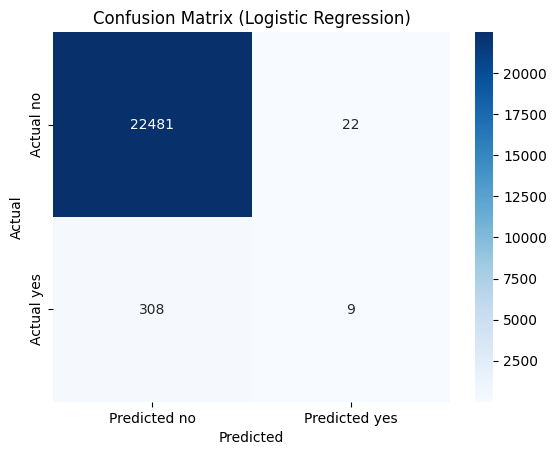

In [157]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

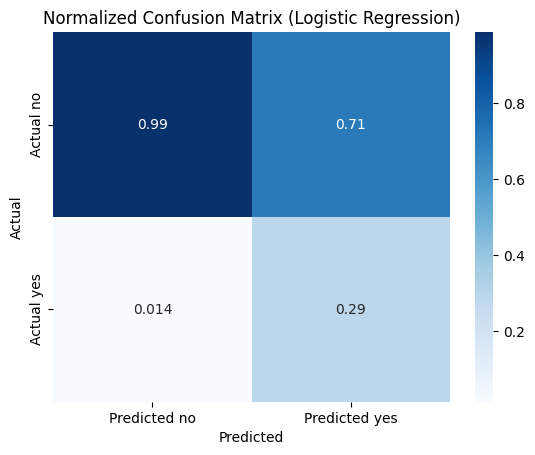

In [158]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression)')
plt.show()

In [159]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [160]:
model_evaluations["Logistic Regression"] = (fpr, tpr, prec, rec)

#### Logistic Regression SMOTE

In [161]:
logreg_icu_smote = LogisticRegression(random_state=RANDOM_SEED)

In [162]:
logreg_icu_smote.fit(x_res, y_res)

LogisticRegression(random_state=6402)

In [163]:
y_pred = logreg_icu_smote.predict(x_test)
y_pred_proba = logreg_icu_smote.predict_proba(x_test)

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     22503
           1       0.06      0.78      0.12       317

    accuracy                           0.84     22820
   macro avg       0.53      0.81      0.51     22820
weighted avg       0.98      0.84      0.90     22820



In [165]:
f1_score(y_test, y_pred)

0.11714690599905526

In [166]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [167]:
auc(fpr, tpr)

0.8747395194836272

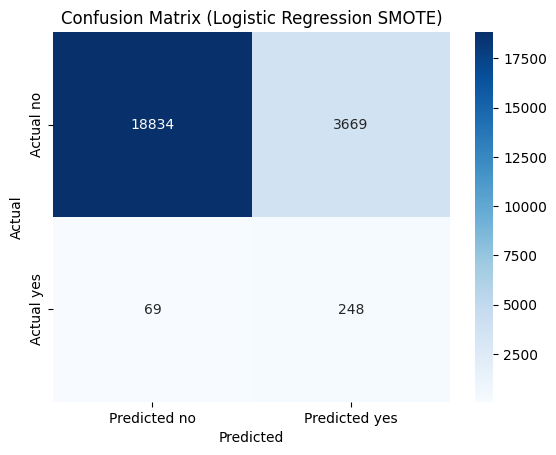

In [168]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

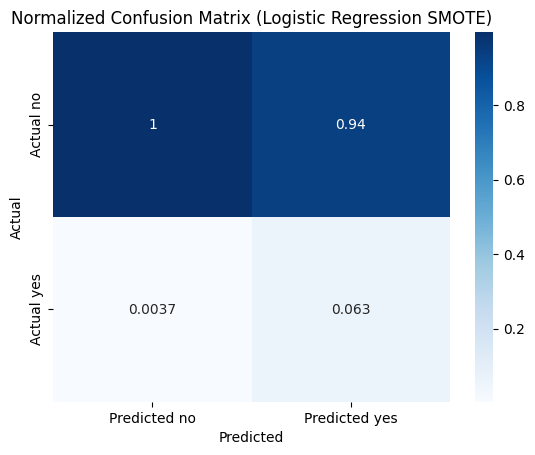

In [169]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

In [170]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [171]:
model_evaluations["Logistic Regression SMOTE"] = (fpr, tpr, prec, rec)

#### Random Forest

In [172]:
rf_icu = RandomForestClassifier(random_state=RANDOM_SEED)

In [173]:
rf_icu.fit(x_train, y_train)
y_pred = rf_icu.predict(x_test)
y_pred_proba = rf_icu.predict_proba(x_test)
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
print(auc(fpr, tpr))
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
model_evaluations["Random Forest"] = (fpr, tpr, prec, rec)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.24      0.05      0.08       317

    accuracy                           0.98     22820
   macro avg       0.61      0.52      0.54     22820
weighted avg       0.98      0.98      0.98     22820

0.756558641813058


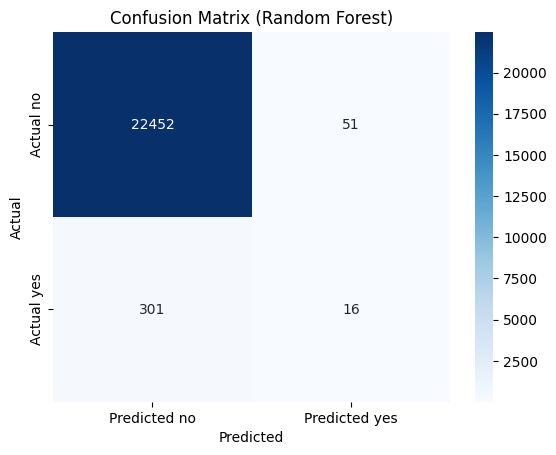

In [174]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

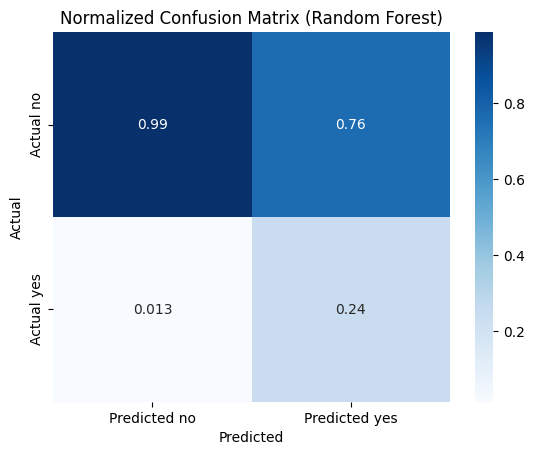

In [175]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest)')
plt.show()

#### Random Forest SMOTE


In [176]:
rf_icu_smote = RandomForestClassifier(random_state=RANDOM_SEED)
rf_icu_smote.fit(x_res, y_res)
y_pred = rf_icu_smote.predict(x_test)
y_pred_proba = rf_icu_smote.predict_proba(x_test)

In [177]:
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
print(auc(fpr, tpr))
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
model_evaluations["Random Forest SMOTE"] = (fpr, tpr, prec, rec)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     22503
           1       0.05      0.19      0.07       317

    accuracy                           0.94     22820
   macro avg       0.52      0.57      0.52     22820
weighted avg       0.97      0.94      0.95     22820

0.7011759105095136


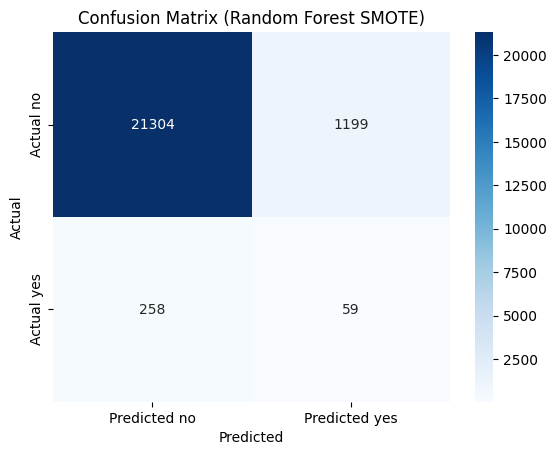

In [178]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest SMOTE)')
plt.show()

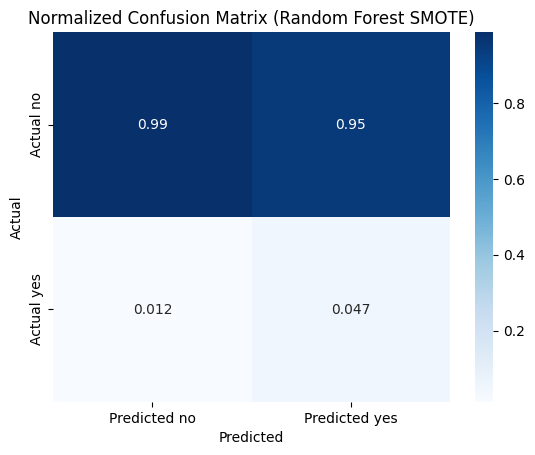

In [179]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest SMOTE)')
plt.show()

#### Neural Network

In [180]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [181]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [182]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - auc: 0.5130 - f1_score: 0.0286 - loss: 0.1570 - val_auc: 0.8682 - val_f1_score: 0.0274 - val_loss: 0.0561
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - auc: 0.8367 - f1_score: 0.0261 - loss: 0.0580 - val_auc: 0.8730 - val_f1_score: 0.0274 - val_loss: 0.0551
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - auc: 0.8537 - f1_score: 0.0300 - loss: 0.0623 - val_auc: 0.8605 - val_f1_score: 0.0274 - val_loss: 0.0574
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - auc: 0.8463 - f1_score: 0.0277 - loss: 0.0584 - val_auc: 0.8795 - val_f1_score: 0.0274 - val_loss: 0.0578
Epoch 5/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - auc: 0.8759 - f1_score: 0.0267 - loss: 0.0548 - val_auc: 0.8804 - val_f1_score: 0.0274 - val_loss: 0.0573
Epoch 6/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - auc: 0.8709 - f1_score: 0.0298 - loss: 0.0585 - val_auc: 0.8649 - val_f1_score: 0.0274 - val_loss: 0.0564
Epoch 7/10
1664/

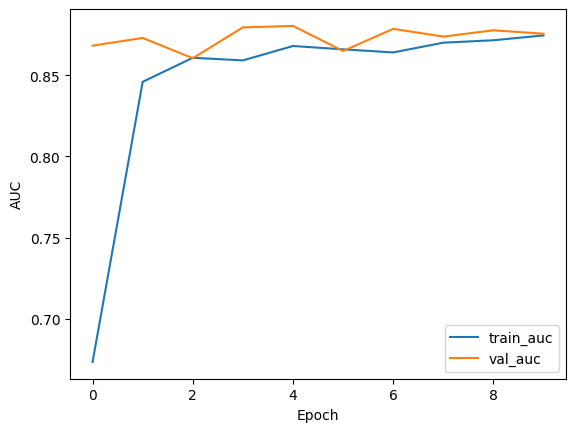

In [183]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [184]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step


In [185]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [186]:
f1_score(y_test, y_pred)

0.0

In [187]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8888984448060273

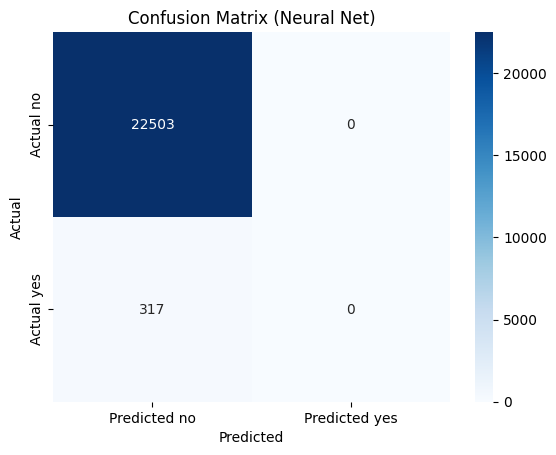

In [188]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

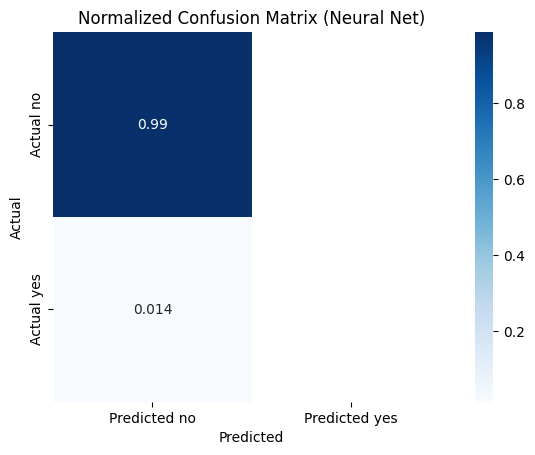

In [189]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [190]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

In [191]:
model_evaluations["Neural Net"] = (fpr, tpr, prec, rec)

#### Neural Net SMOTE

In [192]:
model_smote = Sequential()

model_smote.add(Input((X.shape[1],)))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(1, activation='sigmoid'))

In [193]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])
model_smote.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
history = model_smote.fit(x_res, y_res, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - auc: 0.8597 - f1_score: 0.6655 - loss: 0.4617 - val_auc: 0.8668 - val_f1_score: 0.0274 - val_loss: 0.3612
Epoch 2/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - auc: 0.9054 - f1_score: 0.6660 - loss: 0.3873 - val_auc: 0.8679 - val_f1_score: 0.0274 - val_loss: 0.3829
Epoch 3/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - auc: 0.9134 - f1_score: 0.6693 - loss: 0.3694 - val_auc: 0.8671 - val_f1_score: 0.0274 - val_loss: 0.3981
Epoch 4/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - auc: 0.9193 - f1_score: 0.6652 - loss: 0.3567 - val_auc: 0.8552 - val_f1_score: 0.0274 - val_loss: 0.3671
Epoch 5/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - auc: 0.9219 - f1_score: 0.6688 - loss: 0.3504 - val_auc: 0.8526 - val_f1_score: 0.0274 - val_loss: 0.3880
Epoch 6/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - auc: 0.9221 - f1_score: 0.6658 - loss: 0.3508 - val_auc: 0.8471 - val_f1_score: 0.0274 - val_loss: 0.3217
Epoch 7/10
3282/

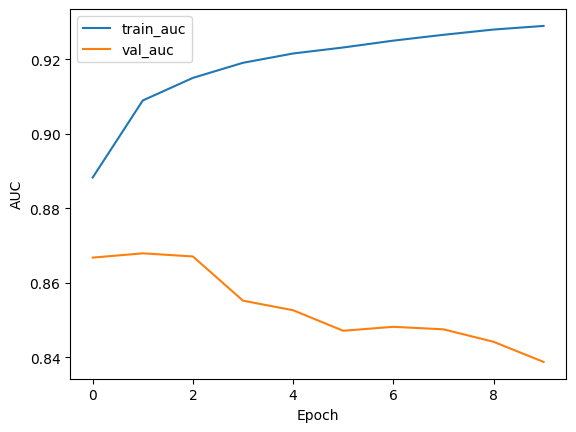

In [195]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [196]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step


In [197]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [198]:
f1_score(y_test, y_pred)

0.0

In [199]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8888984448060273

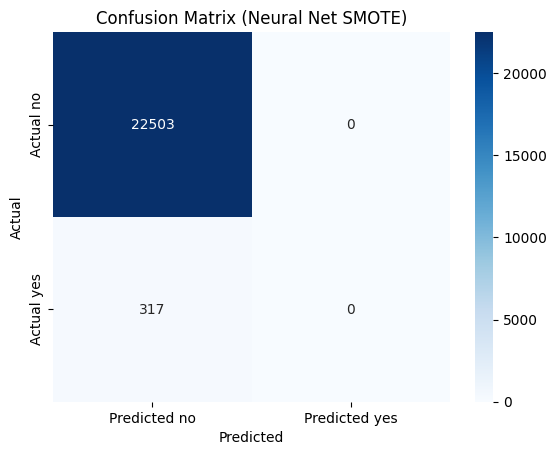

In [200]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

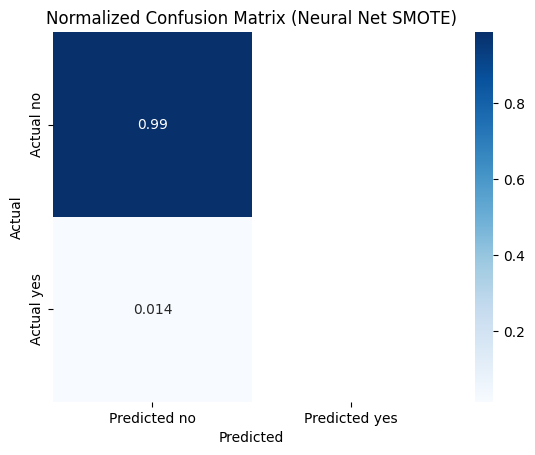

In [201]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [202]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

In [203]:
model_evaluations["Neural Net SMOTE"] = (fpr, tpr, prec, rec)

#### XGBoost

In [204]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.34      0.06      0.11       317

    accuracy                           0.99     22820
   macro avg       0.66      0.53      0.55     22820
weighted avg       0.98      0.99      0.98     22820

0.10638297872340426


0.8673025860835097

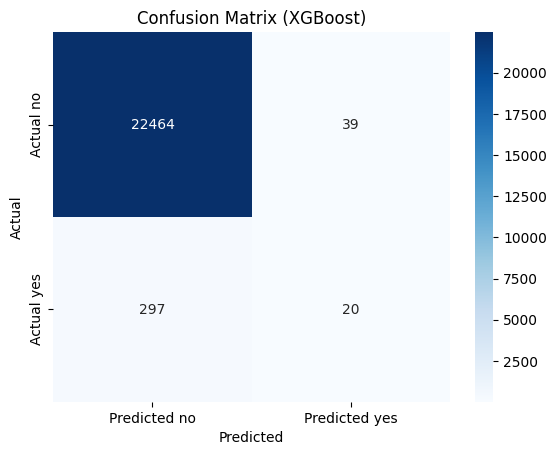

In [205]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

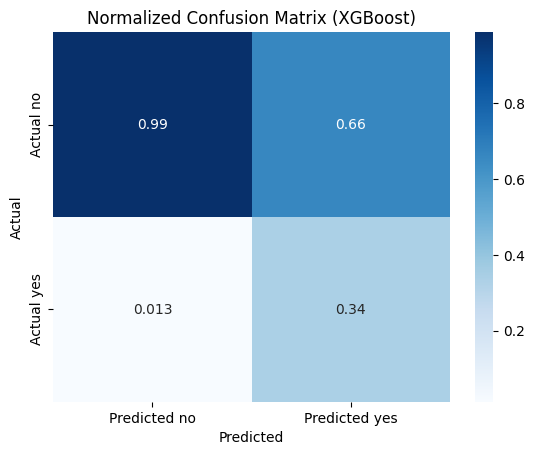

In [206]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost)')
plt.show()

In [207]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [208]:
model_evaluations["XGBoost"] = (fpr, tpr, prec, rec)

In [209]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_res, y_res)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22503
           1       0.08      0.38      0.13       317

    accuracy                           0.93     22820
   macro avg       0.53      0.66      0.55     22820
weighted avg       0.98      0.93      0.95     22820

0.12989801395598496


0.744456855454674

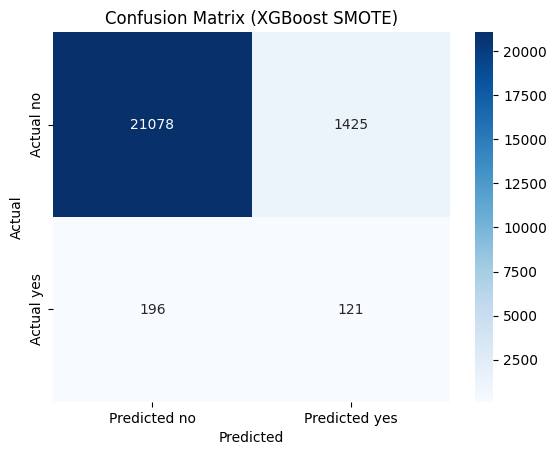

In [210]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost SMOTE)')
plt.show()

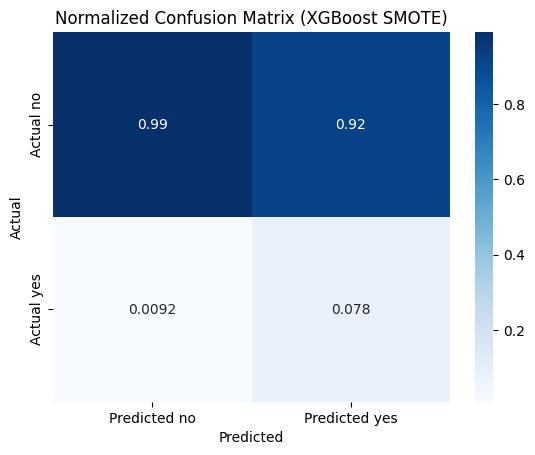

In [211]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost SMOTE)')
plt.show()

In [212]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [213]:
model_evaluations["XGBoost SMOTE"] = (fpr, tpr, prec, rec)

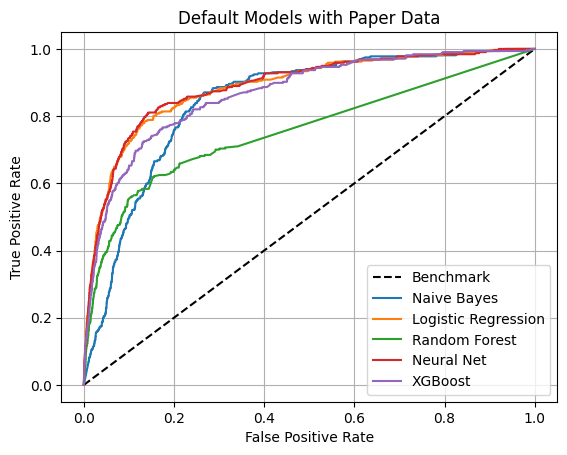

In [214]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    if "SMOTE" in model_name:
        continue
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

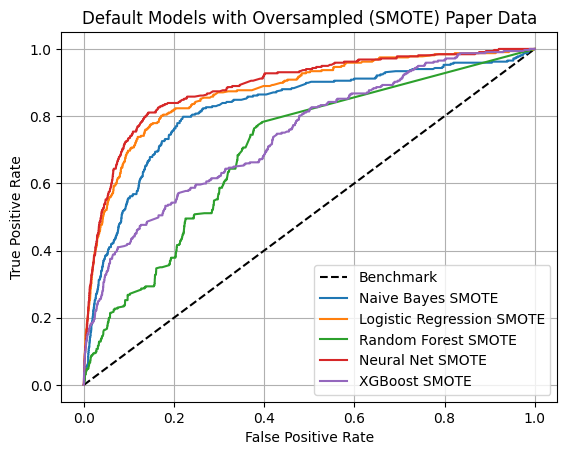

In [215]:
plt.title("Default Models with Oversampled (SMOTE) Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    if "SMOTE" not in model_name:
        continue
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

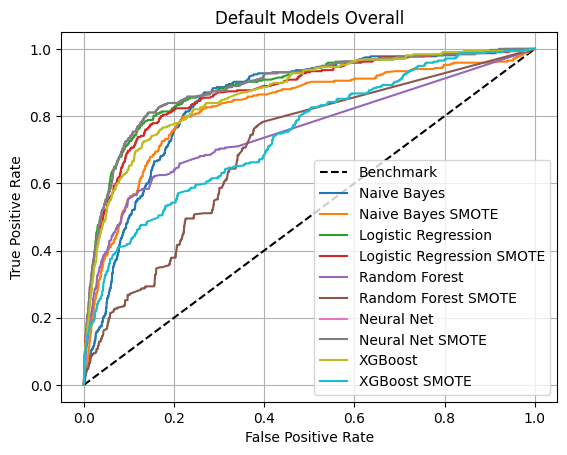

In [216]:
plt.title("Default Models Overall")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

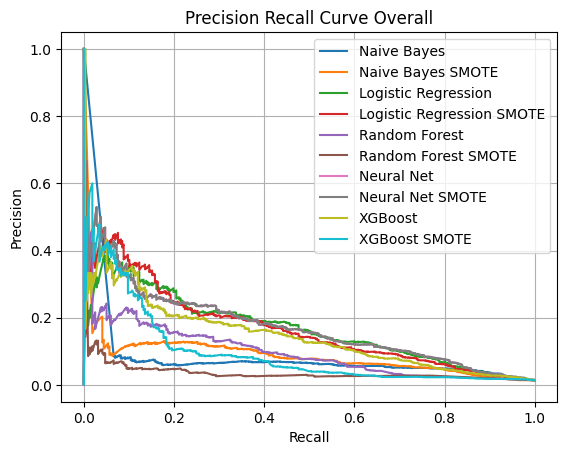

In [217]:
# precision recall curve
plt.title("Precision Recall Curve Overall")
for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name][3], model_evaluations[model_name][2], label=model_name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()